In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

### **Datasets to import:** Cleaned_Weather_Data_for_California, California_Wildfire_Dataset

In [ ]:
climate_dataset= pd.read_csv('/content/Cleaned_Weather_Data_for_California.csv')
fire_dataset= pd.read_csv('/content/California_Wildfire_Dataset.csv')

In [ ]:
climate_dataset.head()

,DATE,Temperature_Max,Relative_Humidity,Precipitation,Wind_Speed,Surface Soil Wetness,Root Zone Soil Wetness
0,1/1/15,9.37,43.38,0.0,2.54,0.56,0.59
1,1/2/15,9.87,49.00,0.0,1.73,0.56,0.59
2,1/3/15,11.43,53.00,0.0,1.60,0.56,0.59
3,1/4/15,14.44,55.62,0.0,1.70,0.56,0.59
4,1/5/15,19.90,53.69,0.0,2.07,0.56,0.59


In [ ]:
fire_dataset.head()

,local_date_,Coordinate_Group_,Local_Time_Min,Max_Brightness,Mean_Brightness,Max_Confidence,Mean_Confidence,FRP,Day_Night,Time_Period,Total_Fire_Incidents,FRP_Bin
0,1/3/15,South-East,10:46:00,328.5,328.500000,86,86.000000,37.4,D,Morning,1,20-40
1,1/7/15,North-Central,13:37:00,322.2,321.800000,81,81.000000,28.3,D,Afternoon,2,20-40
2,1/12/15,North-Central,13:56:00,322.6,322.600000,82,82.000000,140.0,D,Afternoon,1,140-160
3,1/12/15,South-East,21:41:00,311.0,311.000000,81,81.000000,15.7,N,Night,1,0-20
4,1/13/15,North-Central,13:01:00,332.2,326.966667,88,84.666667,40.3,D,Afternoon,3,40-60


In [ ]:
# Rename 'local_date_' to 'Date' in the fire dataset
fire_dataset.rename(columns={'local_date_': 'Date'}, inplace=True)
climate_dataset.rename(columns={'DATE': 'Date'}, inplace=True)

# Ensure the 'Date' column is in datetime format for both datasets
fire_dataset['Date'] = pd.to_datetime(fire_dataset['Date'])
climate_dataset['Date'] = pd.to_datetime(climate_dataset['Date'])

# Perform an outer merge to include all dates from the climate dataset
merged_dataset = pd.merge(
    climate_dataset,
    fire_dataset,
    on='Date',
    how='left'  # 'left' ensures all climate records are kept
)

fire_columns = ['Max_Brightness', 'Mean_Brightness', 'Max_Confidence', 'Mean_Confidence', 'FRP', 'Total_Fire_Incidents']
merged_dataset[fire_columns] = merged_dataset[fire_columns].fillna(0)

categorical_fire_columns = ['Day_Night', 'Time_Period', 'Coordinate_Group_', 'Local_Time_Min', 'FRP_Bin']
merged_dataset[categorical_fire_columns] = merged_dataset[categorical_fire_columns].fillna('No Fire')


# Convert Total_Fire_Incidents > 0 to indicate fire activity
merged_dataset['Fire_Recorded'] = (merged_dataset['Total_Fire_Incidents'] > 0).astype(int)

print("Datasets merged successfully! Fire activity indicated using Total_Fire_Incidents.")


Datasets merged successfully! Fire activity indicated using Total_Fire_Incidents.


In [ ]:
merged_dataset.head()

,Date,Temperature_Max,Relative_Humidity,Precipitation,Wind_Speed,Surface Soil Wetness,Root Zone Soil Wetness,Coordinate_Group_,Local_Time_Min,Max_Brightness,Mean_Brightness,Max_Confidence,Mean_Confidence,FRP,Day_Night,Time_Period,Total_Fire_Incidents,FRP_Bin,Fire_Recorded
0,2015-01-01,9.37,43.38,0.0,2.54,0.56,0.59,No Fire,No Fire,0.0,0.0,0.0,0.0,0.0,No Fire,No Fire,0.0,No Fire,0
1,2015-01-02,9.87,49.00,0.0,1.73,0.56,0.59,No Fire,No Fire,0.0,0.0,0.0,0.0,0.0,No Fire,No Fire,0.0,No Fire,0
2,2015-01-03,11.43,53.00,0.0,1.60,0.56,0.59,South-East,10:46:00,328.5,328.5,86.0,86.0,37.4,D,Morning,1.0,20-40,1
3,2015-01-04,14.44,55.62,0.0,1.70,0.56,0.59,No Fire,No Fire,0.0,0.0,0.0,0.0,0.0,No Fire,No Fire,0.0,No Fire,0
4,2015-01-05,19.90,53.69,0.0,2.07,0.56,0.59,No Fire,No Fire,0.0,0.0,0.0,0.0,0.0,No Fire,No Fire,0.0,No Fire,0


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    6588 non-null   datetime64[ns]
 1   Temperature_Max         6588 non-null   float64       
 2   Relative_Humidity       6588 non-null   float64       
 3   Precipitation           6588 non-null   float64       
 4   Wind_Speed              6588 non-null   float64       
 5   Surface Soil Wetness    6588 non-null   float64       
 6   Root Zone Soil Wetness  6588 non-null   float64       
 7   Coordinate_Group_       6588 non-null   object        
 8   Local_Time_Min          6588 non-null   object        
 9   Max_Brightness          6588 non-null   float64       
 10  Mean_Brightness         6588 non-null   float64       
 11  Max_Confidence          6588 non-null   float64       
 12  Mean_Confidence         6588 non-null   float64 

In [ ]:
merged_dataset = merged_dataset[merged_dataset['Surface Soil Wetness'] != -999]
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6376
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    6377 non-null   datetime64[ns]
 1   Temperature_Max         6377 non-null   float64       
 2   Relative_Humidity       6377 non-null   float64       
 3   Precipitation           6377 non-null   float64       
 4   Wind_Speed              6377 non-null   float64       
 5   Surface Soil Wetness    6377 non-null   float64       
 6   Root Zone Soil Wetness  6377 non-null   float64       
 7   Coordinate_Group_       6377 non-null   object        
 8   Local_Time_Min          6377 non-null   object        
 9   Max_Brightness          6377 non-null   float64       
 10  Mean_Brightness         6377 non-null   float64       
 11  Max_Confidence          6377 non-null   float64       
 12  Mean_Confidence         6377 non-null   float64      

In [ ]:
# Save the merged dataset
merged_dataset.to_csv('merged_fire_climate_dataset.csv', index=False)

## Predicting occurence of any wildfire on a given day

## Random Forest: Gives highest accuracy but a low recall for predicting 'No Fire' Days

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
dataset = merged_dataset.copy()

# Convert categorical features to dummy variables
dataset = pd.get_dummies(dataset, columns=['Coordinate_Group_', 'Day_Night', 'Time_Period'], drop_first=True)

# Select features and target
X = dataset[['Temperature_Max', 'Relative_Humidity', 'Precipitation', 'Wind_Speed',
             'Surface Soil Wetness', 'Root Zone Soil Wetness']]
y = dataset['Fire_Recorded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.41      0.48       267
           1       0.91      0.96      0.93      1647

    accuracy                           0.88      1914
   macro avg       0.75      0.68      0.71      1914
weighted avg       0.87      0.88      0.87      1914


Confusion Matrix:
[[ 109  158]
 [  74 1573]]

ROC-AUC Score:
0.8972015854498816


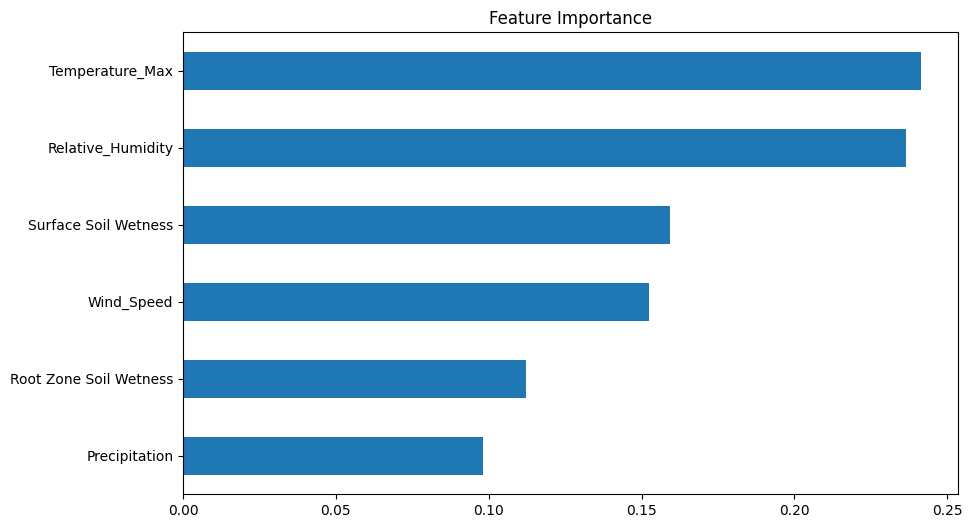

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

### SMOTE based model has a different story to tell!

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
dataset = merged_dataset.copy()

# Feature selection
X = dataset[['Temperature_Max', 'Relative_Humidity', 'Precipitation', 'Wind_Speed',
             'Surface Soil Wetness', 'Root Zone Soil Wetness']]
y = dataset['Fire_Recorded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       267
           1       0.94      0.91      0.92      1647

    accuracy                           0.87      1914
   macro avg       0.74      0.78      0.75      1914
weighted avg       0.88      0.87      0.88      1914


Confusion Matrix:
[[ 172   95]
 [ 150 1497]]

ROC-AUC Score:
0.8985182456355785


**Key Takeaway:**
With an improved recall for predicting 'No Fire' days, SMOTE based model assigns highest importance to the Root Zone Soil Wetness variable. The lower the wetness of soil at root level, the higher are the chances of wildfires.

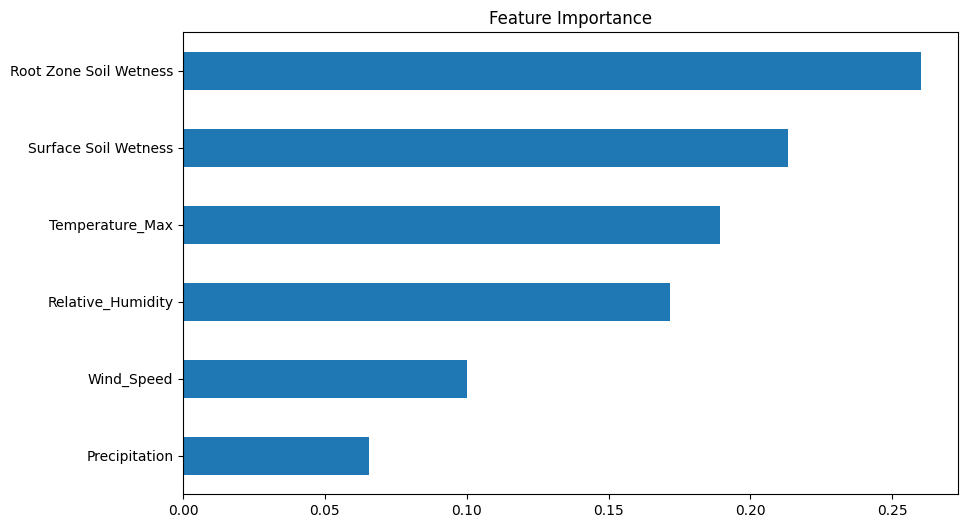

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Update model with class weights
class_weight = {0: 1.5, 1: 1.0}  # Penalize misclassification of class 0 more heavily
model = RandomForestClassifier(random_state=42, class_weight=class_weight)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.47      0.56       314
           1       0.91      0.96      0.93      1663

    accuracy                           0.88      1977
   macro avg       0.80      0.72      0.75      1977
weighted avg       0.87      0.88      0.87      1977


Confusion Matrix:
[[ 147  167]
 [  62 1601]]

ROC-AUC Score:
0.9021212910441188


In [ ]:
# Adjust threshold
threshold = 0.6  # Default is 0.5
y_pred_threshold = (y_proba > threshold).astype(int)

# Evaluate the new threshold
print("Classification Report with Threshold Optimization:")
print(classification_report(y_test, y_pred_threshold))

print("\nConfusion Matrix with Threshold Optimization:")
print(confusion_matrix(y_test, y_pred_threshold))


Classification Report with Threshold Optimization:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       314
           1       0.92      0.94      0.93      1663

    accuracy                           0.88      1977
   macro avg       0.78      0.75      0.76      1977
weighted avg       0.87      0.88      0.88      1977


Confusion Matrix with Threshold Optimization:
[[ 173  141]
 [  98 1565]]


### Adding temporal features does not help improve the model's performance

#### Create temporal features
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Day_Of_Year'] = pd.to_datetime(dataset['Date']).dt.dayofyear

#### Update X with new features
X = dataset[['Temperature_Max', 'Relative_Humidity', 'Precipitation', 'Wind_Speed',
             'Surface Soil Wetness', 'Root Zone Soil Wetness', 'Month', 'Day_Of_Year']]

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost ROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.44      0.53       314
           1       0.90      0.96      0.93      1663

    accuracy                           0.88      1977
   macro avg       0.79      0.70      0.73      1977
weighted avg       0.87      0.88      0.87      1977


XGBoost ROC-AUC Score:
0.8593431025964128


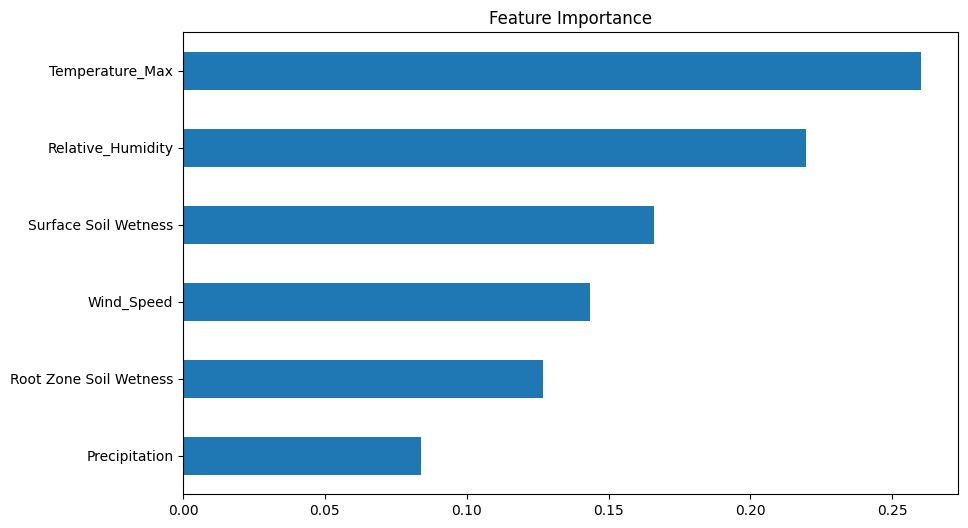

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print("Cross-Validated AUC Scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())


Cross-Validated AUC Scores: [0.93753757 0.9800358  0.97893278 0.97927565 0.98171126]
Mean AUC: 0.9714986105666202


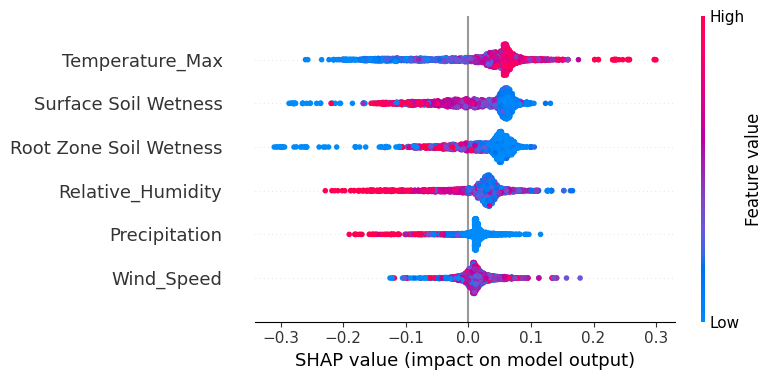

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the desired class (e.g., class 1 for binary classification)
# Assuming a binary classification problem, select values for class 1
# Use [:, 1] to get SHAP values for class 1 across all samples

# shap_values_class1 should have the same shape as X_test.
# To achieve this we will use [:, :, 1] This will select all samples and features,
# but only keep the data for class 1
shap_values_class1 = shap_values[:, :, 1]

# Use shap_values_class1 for the summary plot
shap.summary_plot(shap_values_class1, X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.82      0.50       314
           1       0.96      0.73      0.82      1663

    accuracy                           0.74      1977
   macro avg       0.66      0.77      0.66      1977
weighted avg       0.86      0.74      0.77      1977

SVM ROC-AUC Score: 0.8414231053540719


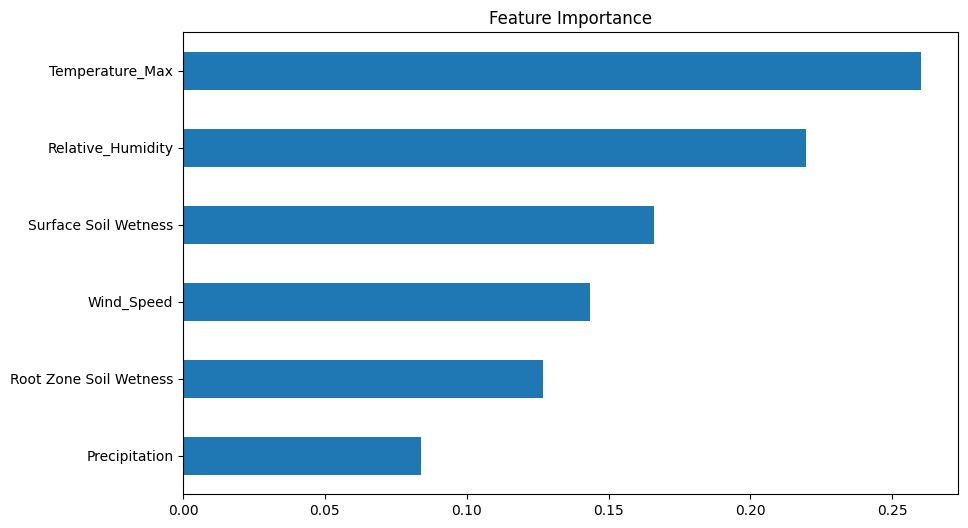

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       314
           1       0.92      0.91      0.92      1663

    accuracy                           0.86      1977
   macro avg       0.74      0.76      0.75      1977
weighted avg       0.87      0.86      0.87      1977

XGBoost ROC-AUC Score: 0.8639267535073978


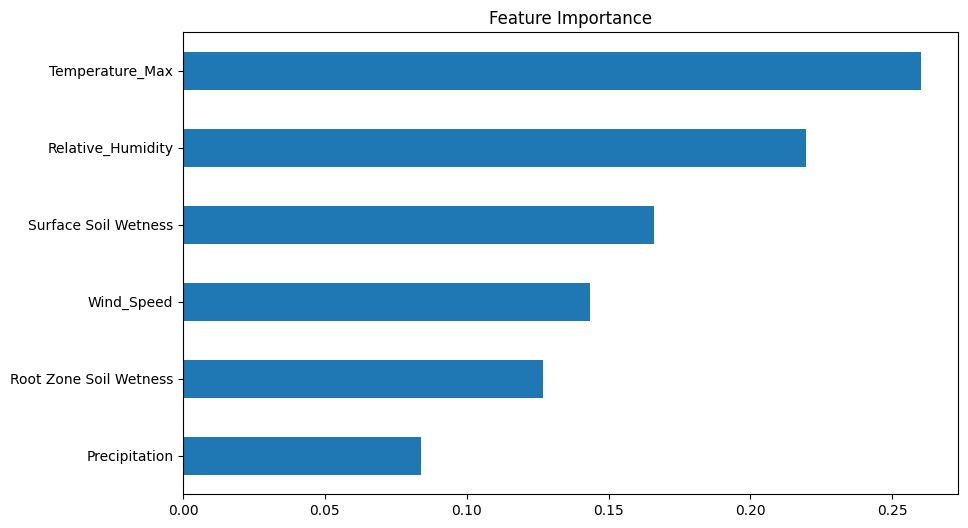

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', model),  # Random Forest
    ('svm', svm_model),  # SVM
    ('xgb', xgb_model)  # XGBoost
], voting='soft')  # Use 'soft' voting for probabilities

# Train ensemble model
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate ensemble model
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("Ensemble ROC-AUC Score:", roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1]))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       314
           1       0.94      0.91      0.92      1663

    accuracy                           0.87      1977
   macro avg       0.76      0.80      0.77      1977
weighted avg       0.88      0.87      0.88      1977

Ensemble ROC-AUC Score: 0.8889735762626824


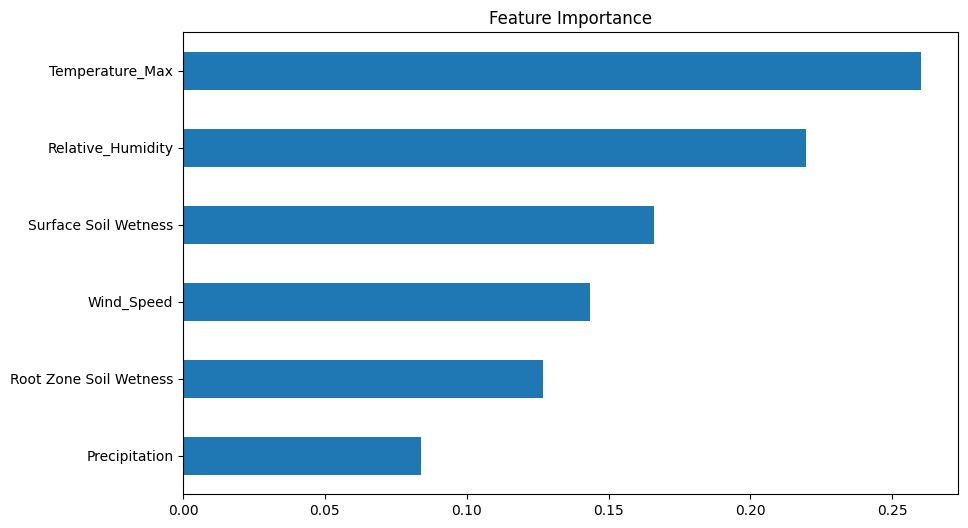

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', model),  # Random Forest
    ('svm', svm_model)  # SVM
], voting='soft')  # Use 'soft' voting for probabilities

# Train ensemble model
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate ensemble model
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("Ensemble ROC-AUC Score:", roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1]))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61       314
           1       0.95      0.87      0.91      1663

    accuracy                           0.85      1977
   macro avg       0.73      0.80      0.76      1977
weighted avg       0.88      0.85      0.86      1977

Ensemble ROC-AUC Score: 0.8911222523947588


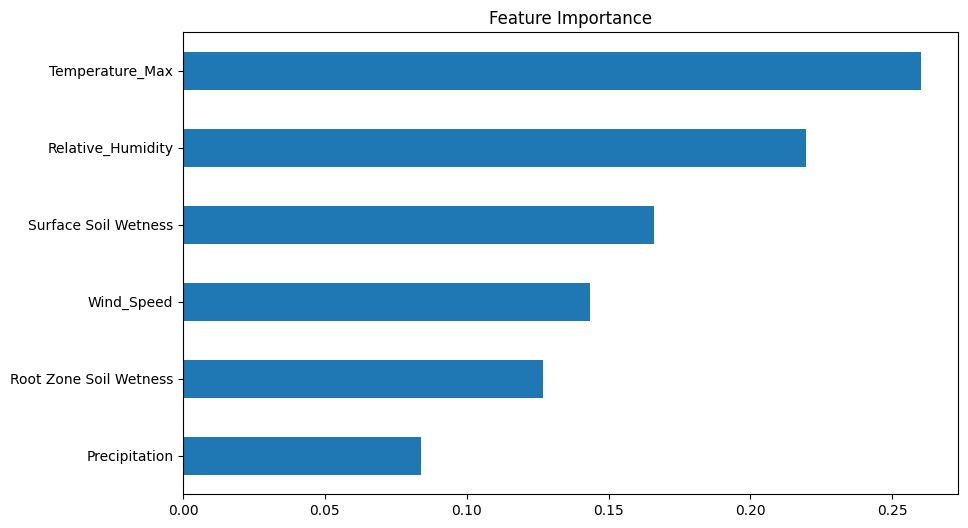

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Define individual models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter to ensure convergence

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('logreg', logreg_model)
], voting='soft')  # Soft voting uses probabilities for predictions


In [ ]:
ensemble_model.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('logreg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1]))

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.77      0.56       314
           1       0.95      0.82      0.88      1663

    accuracy                           0.81      1977
   macro avg       0.70      0.79      0.72      1977
weighted avg       0.87      0.81      0.83      1977


Confusion Matrix:
[[ 242   72]
 [ 307 1356]]

ROC-AUC Score:
0.8818802639692673


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define pipelines for Logistic Regression and SVM (scaling sensitive models)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Random Forest (does not require scaling)
rf_model = RandomForestClassifier(random_state=42)

# Define ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_pipeline),  # Logistic Regression with scaling
    ('svm', svm_pipeline),  # SVM with scaling
    ('rf', rf_model)  # Random Forest
], voting='soft')  # Use soft voting to combine probabilities

# Train the ensemble model
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1]))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.77      0.56       314
           1       0.95      0.82      0.88      1663

    accuracy                           0.81      1977
   macro avg       0.70      0.79      0.72      1977
weighted avg       0.87      0.81      0.83      1977


Confusion Matrix:
[[ 243   71]
 [ 306 1357]]

ROC-AUC Score:
0.8790555783232666


### Adding lagged features

In [ ]:
# Add lagged features (e.g., lagged temperature for 1 day)
dataset['Temperature_Max_Lag1'] = dataset['Temperature_Max'].shift(1)
dataset['Relative_Humidity_Lag1'] = dataset['Relative_Humidity'].shift(1)

# Drop rows with NaN values (caused by shifting)
dataset.dropna(inplace=True)

# Update X with lagged features
X = dataset[['Temperature_Max', 'Relative_Humidity', 'Precipitation', 'Wind_Speed',
             'Surface Soil Wetness', 'Root Zone Soil Wetness', 'Temperature_Max_Lag1', 'Relative_Humidity_Lag1']]

y = dataset['Fire_Recorded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       322
           1       0.92      0.90      0.91      1655

    accuracy                           0.85      1977
   macro avg       0.73      0.74      0.73      1977
weighted avg       0.85      0.85      0.85      1977


Confusion Matrix:
[[ 186  136]
 [ 161 1494]]

ROC-AUC Score:
0.8861927905274812


# Shortlisting model, and Conclusion

## Best Model

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
dataset = merged_dataset.copy()

# Feature selection
X = dataset[['Temperature_Max', 'Relative_Humidity', 'Precipitation', 'Wind_Speed',
             'Surface Soil Wetness', 'Root Zone Soil Wetness']]
y = dataset['Fire_Recorded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.64      0.62       314
           1       0.93      0.92      0.92      1663

    accuracy                           0.87      1977
   macro avg       0.76      0.78      0.77      1977
weighted avg       0.88      0.87      0.88      1977


Confusion Matrix:
[[ 202  112]
 [ 138 1525]]

ROC-AUC Score:
0.9066388730366042


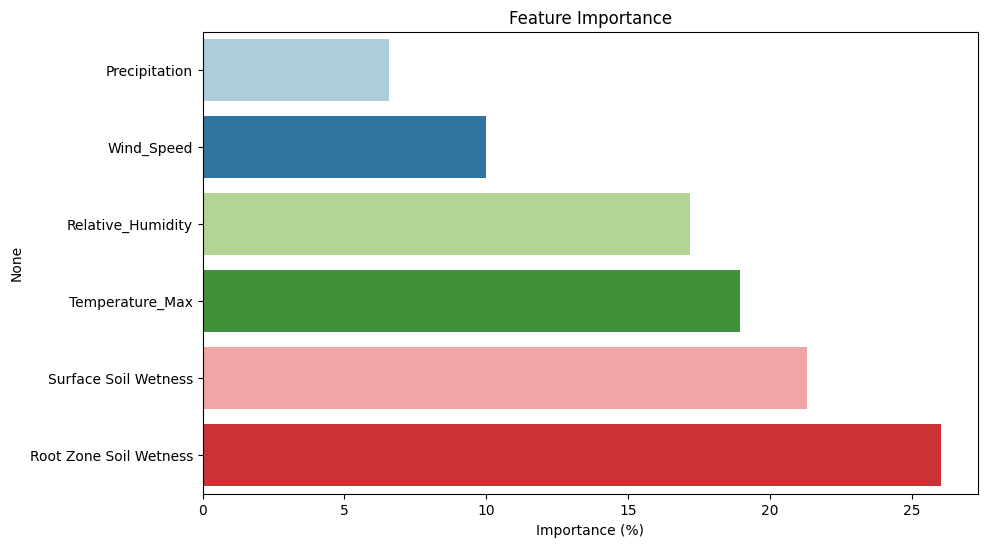

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importances = pd.Series(model.feature_importances_ * 100, index=X.columns)
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="Paired")  # Use a color palette from seaborn
plt.title("Feature Importance")
plt.xlabel("Importance (%)")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define ensemble model with Random Forest and SVM
ensemble_model = VotingClassifier(estimators=[
    ('rf', model),  # Random Forest
    ('svm', svm_model)  # SVM
], voting='soft')  # Use 'soft' voting for probabilities

# Train the ensemble model
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1]))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61       314
           1       0.95      0.87      0.91      1663

    accuracy                           0.85      1977
   macro avg       0.73      0.80      0.76      1977
weighted avg       0.88      0.85      0.86      1977


Confusion Matrix:
[[ 231   83]
 [ 214 1449]]

ROC-AUC Score:
0.8889850665093779


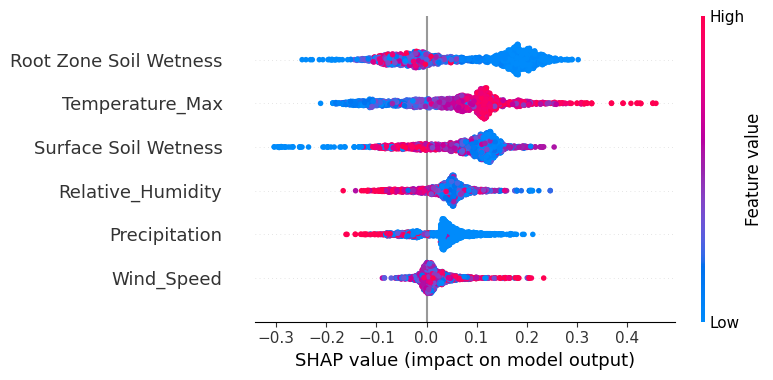

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the desired class (e.g., class 1 for binary classification)
# Assuming a binary classification problem, select values for class 1
# Use [:, 1] to get SHAP values for class 1 across all samples
# The error was caused because we were previously extracting the shap values for class 1
# for all features. Instead, we want to select values for class 1 for each feature
# shap_values_class1 should have the same shape as X_test.
# To achieve this we will use [:, :, 1] This will select all samples and features,
# but only keep the data for class 1
shap_values_class1 = shap_values[:, :, 1]

# Use shap_values_class1 for the summary plot
shap.summary_plot(shap_values_class1, X_test)